Author: Juliana Felix
jufelix16@gmail.com

Implementation of the basic idea of the Linear regression algorithm using only theta 0. Modify the training variables (epochs, alpha, step, etc) and see how each of them interfere in the cost function.

#General Imports

This section provides the general imports for your script. It needs to run first. Although you can add imports along your code, keeping then in the beginning can maintain your code more organized.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Used for performance visualization
from IPython.display import clear_output
from time import sleep

# Data section
This section provides the initial data that will be used by your model to be trained or tested.

In [2]:
area = np.array([480, 510, 520, 850, 960, 1200, 1400, 1650, 1700, 1920, 2350])
price = np.array([98, 110, 200, 210, 280, 265, 300, 287, 325, 300, 290])

# Used for plotting
xlim = 2500
ylim = 400

# Function Section
This section is useful to create your functions that will be used during your algorithm stages.

In [3]:
#-------------------------------------------------------------------------------------
# This function calculates the MSE and returns as a cost function.
#-------------------------------------------------------------------------------------
def CostFunction(y,h):
  
  m = area.shape[0] # Number of samples
  mse = sum(np.square(y - h)) / (2*m) # Cost function / MSE/MSD

  return mse
#-------------------------------------------------------------------------------------
# This function is the model that is been used to adjust the data.
#-------------------------------------------------------------------------------------
def model(x):

  m = x.shape[0] # Number of samples
  return theta_0 * np.ones(m)
#-------------------------------------------------------------------------------------
# This function is used to support visualize the training algorithm evolution.
#-------------------------------------------------------------------------------------
def plotdata(x,y, thetas_0, costs):

  plt.rcParams["figure.figsize"] = (15,5)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  xdata = np.linspace(0,xlim,xlim)  # Generates a sequence fo help ploting the line

  ax1.plot(area, price, 'o')        # Plots the original data
  ax1.plot(xdata,model(xdata))      # Plots the line model
  ax1.set(xlabel='Size of the House (feet2)', ylabel='Price of the House')

  ax2.plot(list(range(0,len(costs))), costs, '-')    # Plots the cost function evolution vs epoch
  ax2.set(xlabel='Epoch',ylabel='J(theta0)')
  
  ymax = np.max(model(xdata))
  if ymax < ylim:
    ymax = ylim
  else:
    ymax = ymax + 50

  ax1.set_xlim(0,xlim)                  # Define limits for x-axis
  ax1.set_ylim(0,ymax)                  # Define limits for x-axis

  ax2.set_xlim(0,100)                  # Define limits for x-axis
  ax2.set_ylim(0,40000)                # Define limits for x-axis

#  for i in range(1,len(costs)):
#    u = thetas_0[i]-thetas_0[i-1]
#    v = costs[i]-costs[i-1]
#    ax2.quiver(thetas_0[i-1], costs[i-1], u, v, angles='xy', scale_units='xy', scale=1)

  plt.show()    # Show the plot
#-------------------------------------------------------------------------------------

#Training Variables
This section defines the training variables that will be used during your algorithm.

In [4]:
#-------------------------------------------------------------------------------------
# Define initial variables for the model and training algorithm
#-------------------------------------------------------------------------------------
initial_theta_0 = 0
epochs = 50
initial_step = 10
factor = -2
alpha = 0.5
#-------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------
# Internal variables for training algorithm
#-------------------------------------------------------------------------------------
theta_0 = initial_theta_0
current_cost = CostFunction(price, model(area))
step = initial_step
epoch = 1
sleeping_time = 0.1

thetas_0 = [initial_theta_0]
costs = [current_cost]
#--------------------------------------------------------------------------------------

# Training Algorithm

This section provides the basic loop for training algorithm.
In this example current training state and model drawing is presented to help visualizing the algorithm performance. However, this is avoided because it makes the training algorithm slow.

Cost:    2778.034090909091
Theta_0: 240.0
Epoch:   50


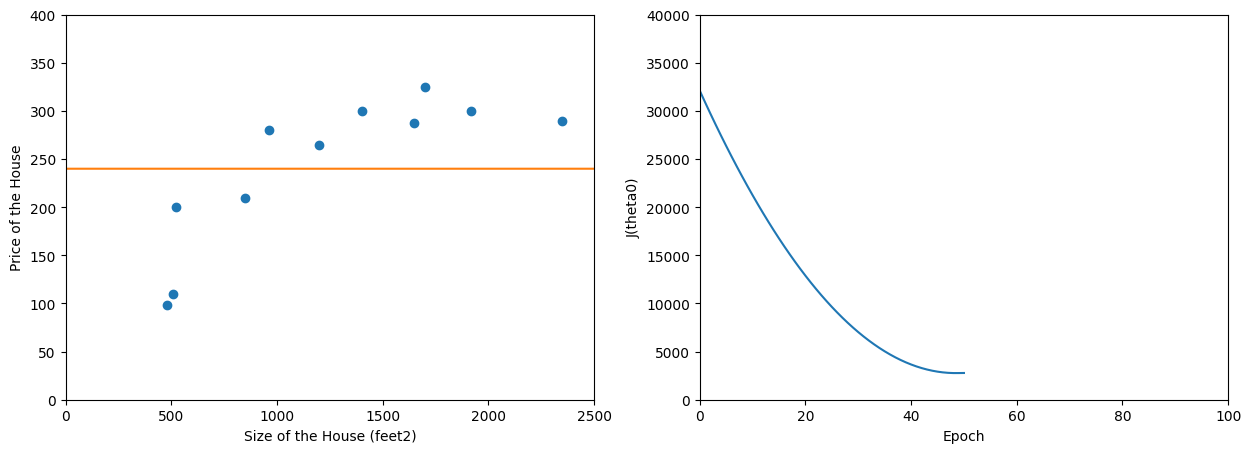

In [5]:
#--------------------------------------------------------------------------------------
try:

  while epoch <= epochs:      # Checks if the maximum epoch was reached
    
    previous_theta0 = theta_0 # Saves the current theta as previous theta
    theta_0 = theta_0 + step*alpha  # Adjusts the theta based on the step
    thetas_0.append(theta_0)
    
    # Evaluate the new parameter 
    # in the current epoch
    h = model(area)
    cost = CostFunction(price, h)
    costs.append(cost)

    if cost >= current_cost:     # If the costs is growing or not evolving
      theta_0 = previous_theta0 # restores the previous theta
      step = step / factor      # and adjusts the step based on the factor
    else:
      current_cost = cost       # If the costs decrease, stores it for future evaluation

    # Prints the current algorithm state
    print("Cost:    {}".format(cost))
    print("Theta_0: {}".format(theta_0))
    print("Epoch:   {}".format(epoch))

    current_cost = cost       # If the costs decrease, stores it for future evaluation

    epoch = epoch + 1           # Move to the new epoch

    # This part is used to visualize
    # the training algorithm performance
    plotdata(area,price,thetas_0,costs)
    sleep(sleeping_time)
    clear_output(wait=True)

except KeyboardInterrupt:
  clear_output(wait=True)
  # Prints the current algorithm state
  print("Cost:    {}".format(cost))
  print("Theta_0: {}".format(theta_0))
  print("Epoch:   {}".format(epoch))
  plotdata(area,price,thetas_0,costs)
#-------------------------------------------------------------------------------------